In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [95]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))  # Increased dropout rate
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(layers.Dense(3, activation='softmax'))  # 3 output classes

In [96]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2  # Specify the validation split here
)

# Configure training set
training_set = train_datagen.flow_from_directory(
    'C:/Users/STEM/MyAI.0.2/Data/training',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Configure validation set
validation_set = train_datagen.flow_from_directory(
    'C:/Users/STEM/MyAI.0.2/Data/training',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2571 images belonging to 3 classes.
Found 642 images belonging to 3 classes.


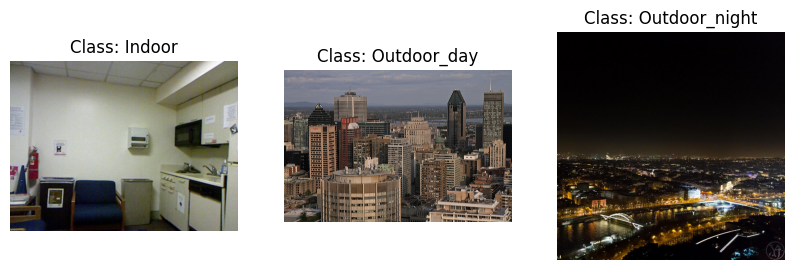

In [98]:
# Display a sample image from each class
class_names = training_set.class_indices
sample_images = []

for class_name, class_index in class_names.items():
    class_path = os.path.join('C:/Users/STEM/MyAI.0.2/Data/training', class_name)
    sample_image = os.listdir(class_path)[0]  # Assuming at least one image is present in each class
    sample_images.append(os.path.join(class_path, sample_image))

# Plot sample images
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(sample_images, 1):
    plt.subplot(1, 3, i)
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(f"Class: {list(class_names.keys())[i-1]}")
    plt.axis('off')

plt.show()

In [102]:
# Example with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model using fit method with increased dropout and L2 regularization
history = model.fit(
    training_set,
    epochs=10,
    validation_data=validation_set,
    callbacks=[early_stopping]
)

Epoch 1/10
81/81 [==============================] - 67s 833ms/step - loss: 0.3454 - accuracy: 0.9732 - val_loss: 0.3626 - val_accuracy: 0.9595
Epoch 2/10
81/81 [==============================] - 36s 447ms/step - loss: 0.3057 - accuracy: 0.9778 - val_loss: 0.3179 - val_accuracy: 0.9673
Epoch 3/10
81/81 [==============================] - 37s 453ms/step - loss: 0.2857 - accuracy: 0.9759 - val_loss: 0.2913 - val_accuracy: 0.9704
Epoch 4/10
81/81 [==============================] - 36s 450ms/step - loss: 0.2644 - accuracy: 0.9771 - val_loss: 0.2784 - val_accuracy: 0.9688
Epoch 5/10
81/81 [==============================] - 36s 448ms/step - loss: 0.2503 - accuracy: 0.9755 - val_loss: 0.2602 - val_accuracy: 0.9688
Epoch 6/10
81/81 [==============================] - 36s 449ms/step - loss: 0.2190 - accuracy: 0.9813 - val_loss: 0.2552 - val_accuracy: 0.9642
Epoch 7/10
81/81 [==============================] - 37s 458ms/step - loss: 0.2101 - accuracy: 0.9778 - val_loss: 0.2234 - val_accuracy: 0.9673

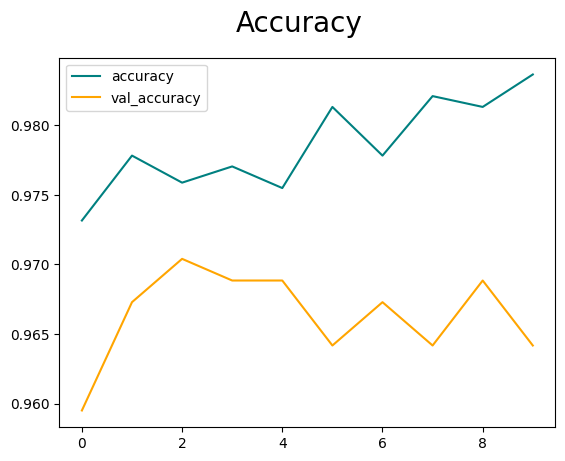

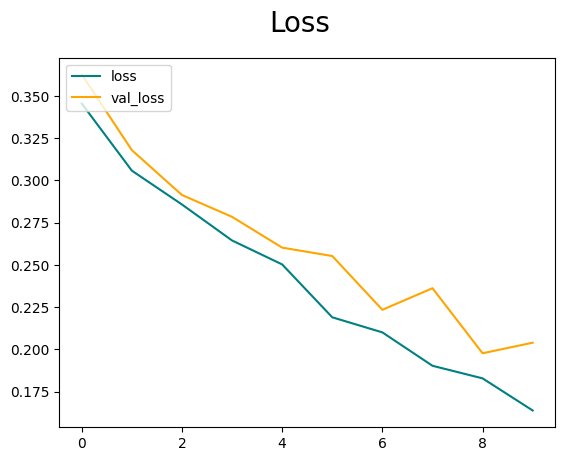

In [103]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [78]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:/Users/STEM/MyAI.0.2/Data/testing', target_size=(64, 64), batch_size=32, class_mode='categorical')

test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 936 images belonging to 3 classes.
30/30 [==============================] - 25s 833ms/step - loss: 0.1597 - accuracy: 0.9348
Test Loss: 0.1597
Test Accuracy: 93.48%


1/1 [==============================] - 0s 55ms/step
Predicted Class: Outdoor_night


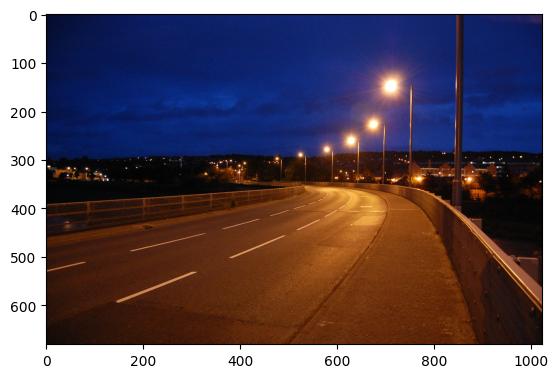

In [68]:
# Make predictions on new images
def predict_image(model, img_path, class_names, generator):
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make a prediction
    prediction = model.predict(img_array)

    # Get the class labels from the generator
    class_labels = list(generator.class_indices.keys())

    # Print the predicted class
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]
    print(f'Predicted Class: {predicted_class_label}')
    return()

# Test the prediction function with a new image
new_image_path = 'C:/Users/STEM/MyAI.0.2/13.jpg'
Img = load_img(new_image_path)
predict_image(model, new_image_path, class_names, training_set)
plt.imshow(Img)

In [64]:
# Save the trained model
model.save('image_classifier_model.h5')